In [1]:
"""

Model of Partial Competitive Equilibrium / Modelo de Equilíbrio Competitivo Parcial

Author / Autor: imoripaolo

Based of / Baseado em: MWG, 10.C

"""

import numpy as np
import matplotlib.pyplot as plt
import math as math

In [2]:
"""
Each consumer have quasilinear preferences: u_i(m_i,x_i) = m_i + alpha_i*ln x_i

The problem of the consumer can be expressed by: L = m_i + alpha_i*ln x_i - T[m_i + px_i - w_i]

FOCs:
    
dL/dm = 1- T = 0 

dL/dx = alpha_i/x_i -Tp = 0

Therefore, x_i = alpha_i/p

We assume alpha ~ U(1,10), w ~ U(200,300) and I=1000

---

Cada consumidor tem preferências quasilineares: u_i(m_i,x_i) = m_i + alpha_i*ln x_i

O problema do consumidor pode ser expresso por: L = m_i + alpha_i*ln x_i - T[m_i + px_i - w_i]

CPOs:
    
dL/dm = 1- T = 0 

dL/dx = alpha_i/x_i -Tp = 0

Logo, x_i = alpha_i/p

Assumimos alpha ~ U(1,10), w ~ U(200,300) e I=1000

""""

alphas = np.random.uniform(low=1, high=10, size=1000)
ws = np.random.uniform(low=200, high=300, size=1000)

# We create a price vector, a individual demand function e a demand matrix
# Criamos um vetor de preços, uma função de demanda individual e uma matriz de demandas.

price = np.linspace(start=0.1,stop=1,num=500)

def ind_dem(alpha,p):
    dem = 2*alpha/p
    return dem

xi = np.zeros((1000,500))

for i in range(0,1000):
    for j in range(0,500):
        xi[i][j] = ind_dem(alphas[i],price[j])
        


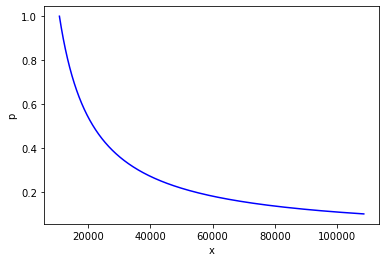

In [3]:
# From individual demandas, we calculate the market demand for each price level.
# A partir das demandas individuais, calculamos a demanda de mercado a cada nível de preços.

x_aux = np.zeros((1000,500))

for j in range(0,500):
    x_aux[0][j] = xi[0][j]

for i in range(1,1000):
        x_aux[i] = x_aux[i-1] + xi[i]
        
x = np.zeros(500)

for i in range(0,500):
    x[i] =x_aux[999][i]

fig, ax = plt.subplots()
ax.plot(x,price,'b')
ax.set_ylabel('p')
ax.set_xlabel('x')
plt.show()

In [4]:
""""
For the producers, we assume the cost funcion takes the format c_j = beta_j*ln q_j

So, the supply function for the firm is given by q_j = gamma_j*e^(c_j) = gamma_j*e^p

We assume gamma ~ U(1,10) and J = 700

---
Para as firmas, assumimos uma função de custo no formato c_j = beta_j*ln q_j

Logo, a função de oferta da firma é dado por q_j = gamma_j*e^(c_j) = gamma_j*e^p

Assumimos gamma ~ U(1,10) e J = 700

"""""

gamma = np.random.uniform(low=1, high=10, size=700)

# We create a supply function and a individual supply matrix
# Criamos uma função de oferta e uma matriz de ofertas individuais

def ind_sup(gamma,p):
    sup = 6*gamma*math.exp(p)
    return sup

qi = np.zeros((700,500))

# We now found the individual supply for each firm and each price level
# Agora encontramos a oferta individual para cada firma e nível de preços

for i in range(0,700):
    for j in range(0,500):
        qi[i][j] = ind_sup(gamma[i],price[j])

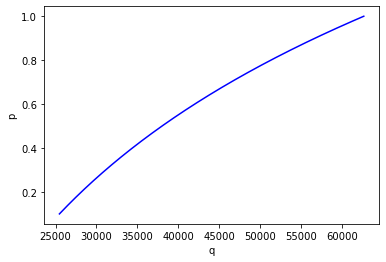

In [5]:
# From individual supply, we calculate the market supply at each price level.
# A partir das ofertas individuais, calculamos a oferta de mercado a cada nível de preços.

q_aux = np.zeros((700,500))

for j in range(0,500):
    q_aux[0][j] = qi[0][j]

for i in range(1,700):
        q_aux[i] = q_aux[i-1] + qi[i]
        
q = np.zeros(500)

for i in range(0,500):
    q[i] =q_aux[699][i]

fig, ax = plt.subplots()
ax.plot(q,price,'b')
ax.set_ylabel('p')
ax.set_xlabel('q')
plt.show()

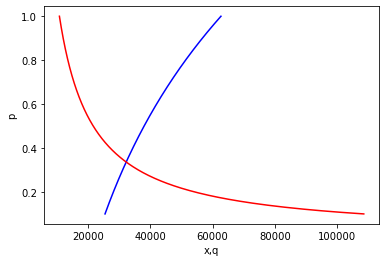

Equilíbrio de Mercado: p*= 0.33627254509018034 q*= 32267.86772387658


In [6]:
# Now, let's generate a numeric solution and plot the equilibrium:
# Agora, vamos gerar a solução numérica e plotar o equilíbrio:

fig, ax = plt.subplots()
ax.plot(q,price,'b')
ax.plot(x,price,'r')
ax.set_ylabel('p')
ax.set_xlabel('x,q')
plt.show()

xS = (q-x)**2

pstar = price[np.argmin(xS)]
qstar = q[np.argmin(xS)]
# print("Market Equilibrium: p* =",pstar, "q*=", qstar )
print("Equilíbrio de Mercado: p*=",pstar, "q*=", qstar )
